In [ ]:
import torch
import torch.nn as nn

# Define the UNet model class
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )
        self.decoder = nn.Sequential(
            nn.Conv2d(64, 3, kernel_size=3, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [ ]:
import torch

# Define the model architecture, as before
model = UNet()  # Or your model class
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Load the model weights
model.load_state_dict(torch.load('/content/dehaze_unet_model(1).pth', map_location=device))
model.eval()  # Set model to evaluation mode


<ipython-input-2-79709fd7fc22>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/dehaze_unet_model(1).pth', map_location=device))


UNet(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (decoder): Sequential(
    (0): Conv2d(64, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Sigmoid()
  )
)

In [ ]:
import torch
import torch.nn as nn

# Define the UNet model class (the same as you shared)
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )
        self.decoder = nn.Sequential(
            nn.Conv2d(64, 3, kernel_size=3, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Load the pre-trained model (replace 'path_to_your_model.pth' with the actual path)
model = UNet()

# Load the state_dict from the .pth file and map it to CPU
model.load_state_dict(torch.load('/content/dehaze_unet_model(1).pth', map_location=torch.device('cpu')))

# Set the model to evaluation mode
model.eval()

# Create an example input tensor to trace the model
example_input = torch.randn(1, 3, 256, 256)  # (batch_size, channels, height, width)

# Use torch.jit.trace to trace the model
traced_model = torch.jit.trace(model, example_input)

# Save the traced model to a .pt file (TorchScript format)
torch.jit.save(traced_model, 'model_traced.pt')  # Save TorchScript model

from google.colab import files
files.download('model_traced.pt')



<ipython-input-6-8302f9d2e2f1>:28: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/dehaze_unet_model(1).pth', map_location=torch.dev

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load the saved TorchScript model
loaded_model = torch.load('/content/model.pt')

# Test the loaded model (e.g., make a forward pass)
output = loaded_model(example_input)
print(output)


<ipython-input-7-5a8d64384df0>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model = torch.load('/content/model.pt')


tensor([[[[2.6969e-02, 5.9266e-03, 8.0508e-01,  ..., 6.4251e-02,
           1.9352e-02, 3.6282e-02],
          [2.0892e-02, 6.0325e-03, 7.2906e-02,  ..., 5.8920e-04,
           5.3706e-05, 6.7676e-03],
          [2.1878e-01, 8.9587e-03, 2.3233e-05,  ..., 1.5959e-02,
           4.7816e-03, 8.4875e-03],
          ...,
          [1.4281e-02, 9.9802e-01, 9.9918e-01,  ..., 5.8759e-01,
           4.0988e-03, 5.7066e-03],
          [8.1910e-01, 4.5158e-01, 8.4607e-01,  ..., 5.6561e-01,
           8.8405e-01, 4.1990e-01],
          [1.6286e-01, 5.9534e-02, 2.4434e-01,  ..., 6.1388e-01,
           9.7677e-01, 3.6174e-01]],

         [[7.0686e-02, 1.0494e-02, 7.5363e-01,  ..., 2.6686e-01,
           7.1060e-02, 6.0202e-02],
          [2.0281e-02, 9.0103e-03, 2.4507e-02,  ..., 4.9538e-03,
           1.8053e-04, 8.7161e-03],
          [1.3992e-01, 1.6951e-02, 8.0998e-05,  ..., 3.0912e-02,
           2.2358e-03, 2.8970e-03],
          ...,
          [3.3896e-03, 9.2260e-01, 9.6859e-01,  ..., 9.5731

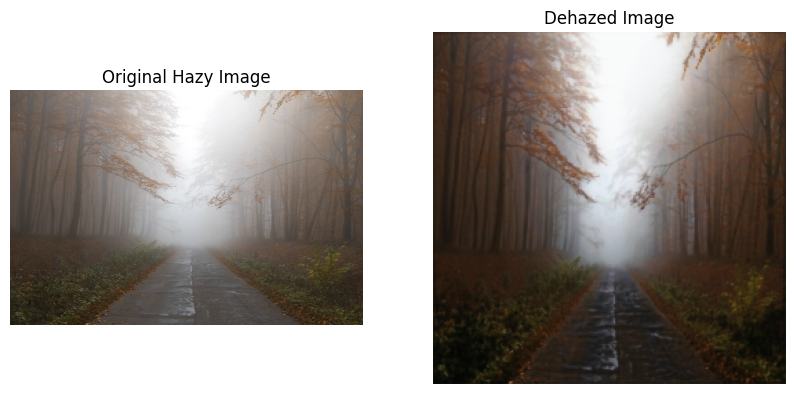

In [ ]:
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def dehaze_image(model, image_path):
    # Load and preprocess the image
    image = Image.open(image_path).convert('RGB')
    transform = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.ToTensor()
    ])
    image_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension and send to device

    # Perform inference
    with torch.no_grad():
        output = model(image_tensor)

    # Post-process output for display
    output_image = output.squeeze(0).cpu().numpy().transpose(1, 2, 0)  # Convert to HWC format
    output_image = np.clip(output_image, 0, 1)  # Ensure values are in [0, 1]

    # Display the original and dehazed images
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(image)
    axs[0].set_title("Original Hazy Image")
    axs[0].axis("off")
    axs[1].imshow(output_image)
    axs[1].set_title("Dehazed Image")
    axs[1].axis("off")
    plt.show()

# Example usage
dehaze_image(model, '/content/autumn-1839969_640.jpg')


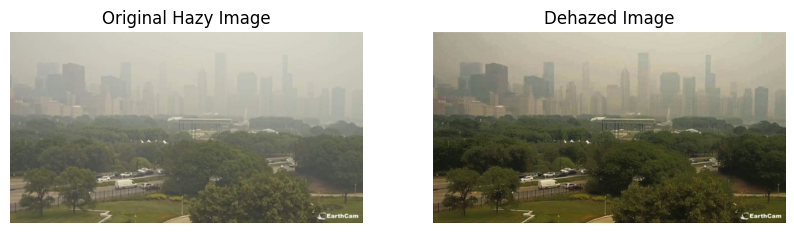

In [ ]:
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch

def dehaze_image(model, image_path, device):
    # Load and preprocess the image
    image = Image.open(image_path).convert('RGB')
    original_size = image.size  # Store original dimensions (width, height)

    transform = transforms.Compose([
        transforms.ToTensor()
    ])
    image_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension and send to device

    # Perform inference
    with torch.no_grad():
        output = model(image_tensor)

    # Post-process output for display
    output_image = output.squeeze(0).cpu().numpy().transpose(1, 2, 0)  # Convert to HWC format
    output_image = np.clip(output_image, 0, 1)  # Ensure values are in [0, 1]
    output_image = Image.fromarray((output_image * 255).astype(np.uint8))  # Convert to PIL image
    output_image = output_image.resize(original_size, Image.BICUBIC)  # Resize to original dimensions

    # Display the original and dehazed images
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(image)
    axs[0].set_title("Original Hazy Image")
    axs[0].axis("off")
    axs[1].imshow(output_image)
    axs[1].set_title("Dehazed Image")
    axs[1].axis("off")
    plt.show()

# Example usage (make sure to define 'model' and 'device' before calling)
dehaze_image(model, '/content/WhatsApp Image 2025-02-05 at 12.44.40.jpeg', device)